In [1]:
import numpy as np
import time
import copy
import math
import matplotlib.pyplot as plt

In [2]:
matrix_A = [[0, 0, 1, 1, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]

In [3]:
matrix_B = [[0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 1, 1, 1, 1, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]

In [4]:
matrix_C = [[0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]

In [5]:
matrix_D = [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]

In [6]:
def get_dist(node_i, node_f, list_nodes):
    n_i = list_nodes[node_i][0]
    n_f = list_nodes[node_f][0]
    return round(np.sqrt((n_f[0] - n_i[0])**2 + (n_f[1] - n_i[1])**2), 2)

In [7]:
def get_adj_nodes(node_i, matrix):
    list_nodes = {
    node_i : [(int(node_i.split(',')[0]), int(node_i.split(',')[1])) ]
    }
    node_i = (int(node_i.split(',')[0]), int(node_i.split(',')[1]))
    for i in range(-1, 2, 1):
        for j in range(-1, 2, 1):
            if i == 0 and j == 0:
                continue
            x = node_i[0] + i
            y = node_i[1] + j
            if x < 0 or x > len(matrix[:]) - 1 or y < 0 or y > len(matrix[0][:]) - 1:
                continue
            if matrix[x][y] == 0:
                node_position =  str(x) + ',' + str(y)
                list_nodes[str(node_i[0]) + ',' + str(node_i[1])].append(node_position)
                list_nodes[node_position] = []
                list_nodes[node_position].append((x, y))
    return list_nodes

In [8]:
def manhatan_dis(node_i, node_f, list_nodes):
    n_i = list_nodes[node_i][0]
    n_f = list_nodes[node_f][0]
    return abs((n_f[0] - n_i[0])) + abs((n_f[1] - n_i[1]))

In [9]:
def dijkstra(initial_node, final_node, matrix):
    # path es la lista de todos los elementos visitados en la cuadricula
    path = [initial_node]
    # current corresponde al nodo que se está evaluando
    current = initial_node
    # list_nodes será el diccionario de todos los nodos que se irán evaluando, cuyo primer elemento estarán
    # las coordenadas, el segundo será la distancia manhattan acumulada del nodo inicial al nodo evaluado
    # y en último lugar se tendrá el nodo del cual provienen
    list_nodes = {}
    list_nodes[initial_node] = []
    list_nodes[initial_node].append(initial_node)
    list_nodes[initial_node].append(0)
    # used_nodes corresponde a la lista de nodos que ya han sido utilizados como current
    used_nodes = [initial_node]
    # El ciclo while se ejecutara hasta que current sea el nodo al que se quiere llegar
    while current != final_node:
        # Se obtienen los nodos adyacentes al nodo que se está evaluando
        list_adj_nodes = get_adj_nodes(current, matrix)
        for i in list_adj_nodes:
            # Los nodos adyacentes solo pasan a ser parte de list_nodes a menos que no se encuentren en la lista de los nodos ya visitados
            if i not in path:
                list_nodes[i] = [(int(i.split(',')[0]), int(i.split(',')[1])), 
                                 round(float(get_dist(current, i, list_adj_nodes) + list_nodes[current][1]), 2), 
                                 current]
        temp_val = math.inf
        new_current = ''
        # Se procede a evaluar cual será el siguiente nodo current
        for j in list_nodes:
            # Se asignan en path todos los nodos visitados que aún no han sido agregados
            if j not in path:
                path.append(j)
            if j == final_node:
                temp_val = list_nodes[j][2]
                new_current = j
                break
            # Si el nodo ya fue un nodo evaluado se continua
            if j in used_nodes:
                continue
            else:
                # Se pretende encontrar el nodo de list_nodes que tenga la menor distancia manhattan acumulada 
                # para que sea el proximo nodo a evaluar 
                if list_nodes[j][1] <= temp_val: 
                    temp_val = list_nodes[j][1]
                    new_current = j
        # Se agrega en la lista de nodos que han sido current el nodo que se extá evaluando
        used_nodes.append(new_current)
        # Se asigna el proximo nodo a evaluar
        current = new_current
    # r_path corresponde al camino reconstruido el cual es el más corto
    r_path = []
    # r_node corresponde a cada nodo del camino reconstruido
    r_node = final_node
    # El ciclo while empieza desde el nodo final y no se detine hasta que se de con el nodo inicial
    while r_node != initial_node:
        r_path.insert(0, r_node)
        # Se asigna el nuevo valor de r_node que corresponde al nodo del cual proviene el antiguo r_node
        r_node = list_nodes[r_node][2]
    # Se agrega el nodo inicial para que la lista esté completa
    r_path.insert(0, initial_node)
    # Se retorna la colección de nodos visitados y el camino que corresponde al más corto
    #print(list_nodes)
    return path, r_path

In [10]:
def a_estrella(initial_node, final_node, matrix):
    # path es la lista de todos los elementos visitados en la cuadricula
    path = [initial_node]
    # current corresponde al nodo que se está evaluando
    current = initial_node
    # list_nodes será el diccionario de todos los nodos que se irán evaluando, cuyo primer elemento estarán
    # las coordenadas, el segundo será la distancia euclideana acumulada del nodo inicial al nodo evaluado (G),
    # en la tercera posición se encuentra la suma la la distancia manhattan del nodo evaluado al final_node y G (H)
    # y en último lugar se tendrá el nodo del cual provienen
    list_nodes = {}
    list_nodes[initial_node] = [(int(initial_node.split(',')[0]), int(initial_node.split(',')[1]))]
    list_nodes[initial_node].append(0)
    list_nodes[initial_node].append(initial_node)
    # used_nodes corresponde a la lista de nodos que ya han sido utilizados como current
    used_nodes = [initial_node]
    # El ciclo while se ejecutara hasta que current sea el nodo al que se quiere llegar
    while current != final_node:
        # Se obtienen los nodos adyacentes al nodo que se está evaluando
        list_adj_nodes = get_adj_nodes(current, matrix)
        # Se hace una nueva lista que incluya al nodo final
        new_list = copy.deepcopy(list_adj_nodes)
        new_list[final_node] = [(int(final_node.split(',')[0]), int(final_node.split(',')[1]))]
        for i in list_adj_nodes:
            # Los nodos adyacentes solo pasan a ser parte de list_nodes a menos que no se encuentren en la lista de los nodos ya visitados
            if i not in path:
                # G es el costo de llegar del nodo inicial al nodo i, en este caso se ha utilizado la distancia euclideana
                G = round(float(get_dist(current, i, new_list) + list_nodes[current][1]), 2)
                # H corresponde a la euristica, que para este caso es la distancia manhattan
                H = manhatan_dis(i, final_node, new_list)
                # F es el estimado del costo de la solución que pasa por i
                F = G + H
                list_nodes[i] = [(int(i.split(',')[0]), int(i.split(',')[1])), G, F, current]
        temp_val = math.inf
        new_current = ''
        # Se procede a evaluar cual será el siguiente nodo current
        for j in list_nodes:
            # Se asignan en path todos los nodos visitados que aún no han sido agregados
            if j not in path:
                path.append(j)
            if j == final_node:
                temp_val = list_nodes[j][2]
                new_current = j
                break
            # Si el nodo ya fue un nodo evaluado se continua
            if j in used_nodes:
                continue
            else:
                # Se pretende encontrar el nodo de list_nodes que tenga el menor costo de solución 
                # para que sea el proximo nodo a evaluar 
                if list_nodes[j][2] <= temp_val: 
                    temp_val = list_nodes[j][2]
                    new_current = j
        # Se agrega en la lista de nodos que han sido current el nodo que se extá evaluando
        used_nodes.append(new_current)
        # Se asigna el proximo nodo a evaluar
        current = new_current
    # r_path corresponde al camino reconstruido el cual es el más corto
    r_path = []
    # r_node corresponde a cada nodo del camino reconstruido
    r_node = final_node
    # El ciclo while empieza desde el nodo final y no se detine hasta que se de con el nodo inicial
    while r_node != initial_node:
        r_path.insert(0, r_node)
        # Se asigna el nuevo valor de r_node que corresponde al nodo del cual proviene el antiguo r_node
        r_node = list_nodes[r_node][3]
    # Se agrega el nodo inicial para que la lista esté completa
    r_path.insert(0, initial_node)
    # Se retorna la colección de nodos visitados y el camino que corresponde al más corto
    return path, r_path

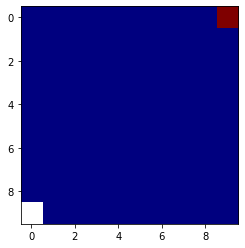

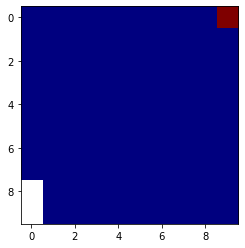

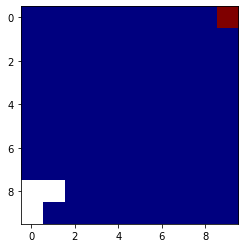

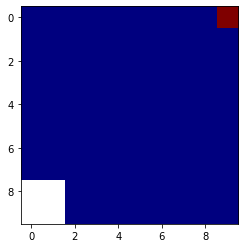

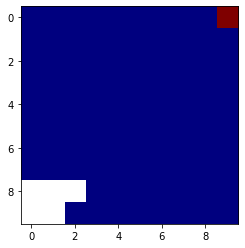

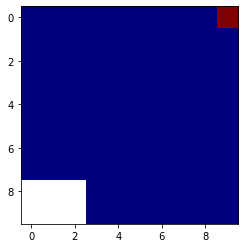

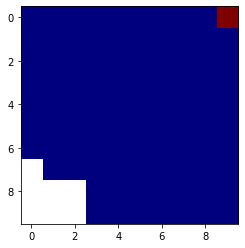

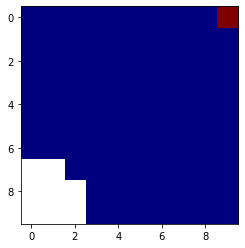

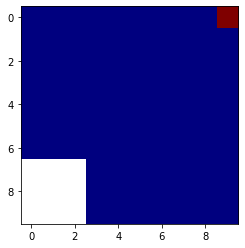

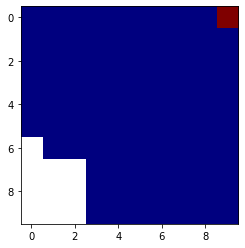

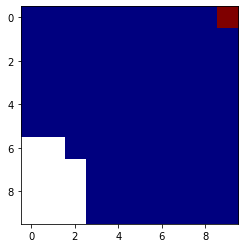

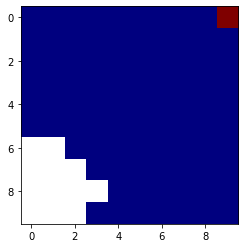

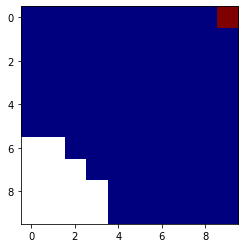

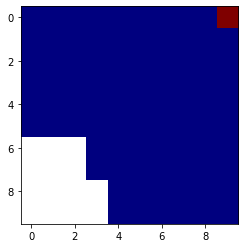

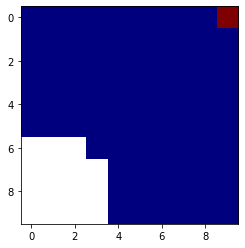

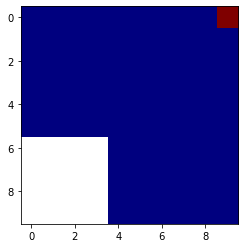

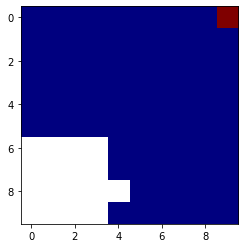

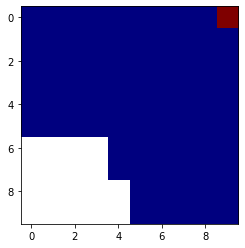

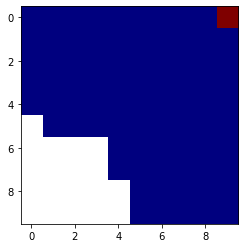

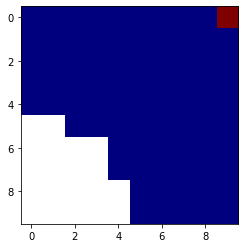

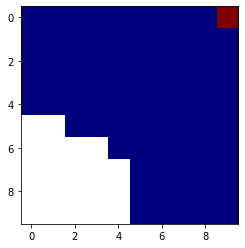

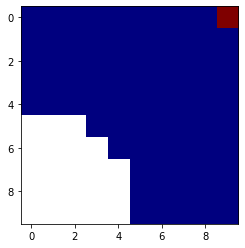

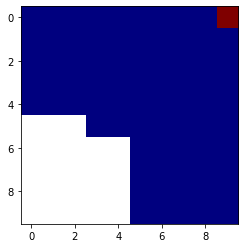

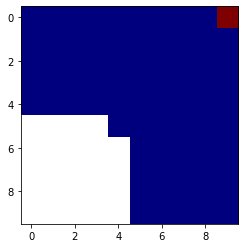

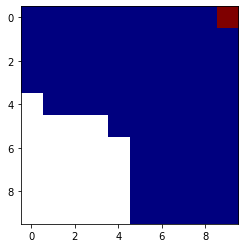

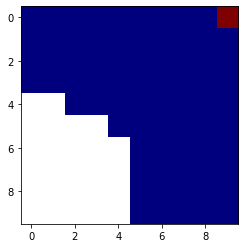

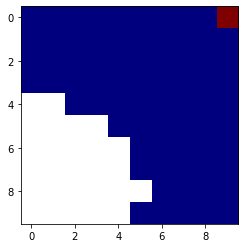

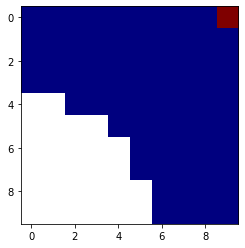

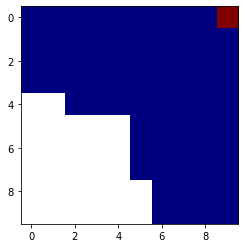

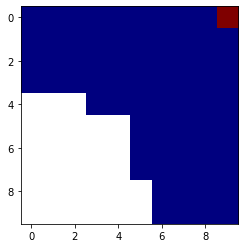

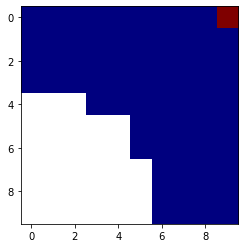

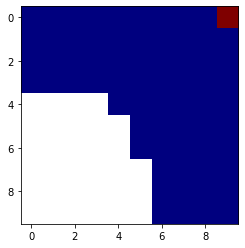

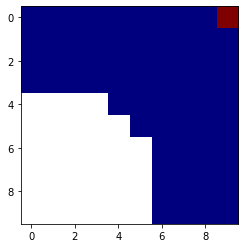

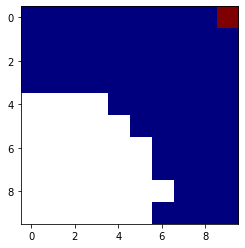

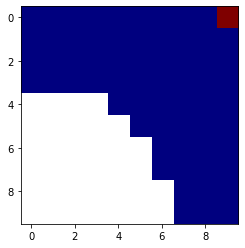

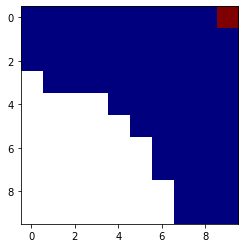

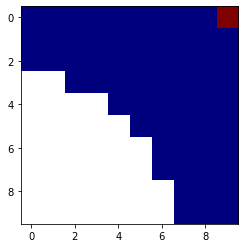

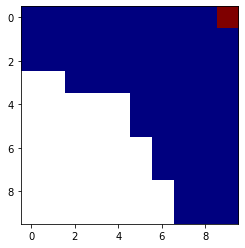

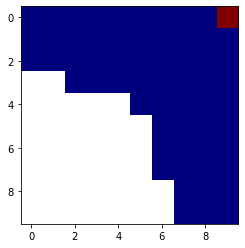

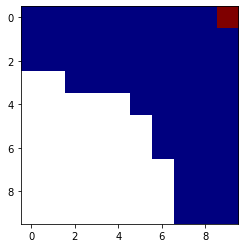

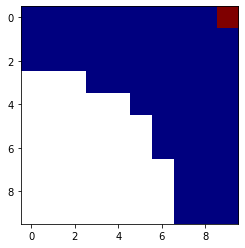

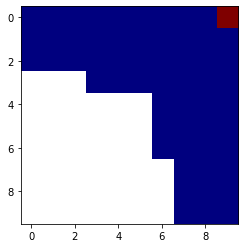

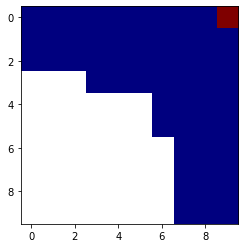

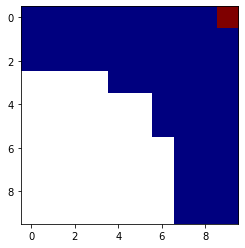

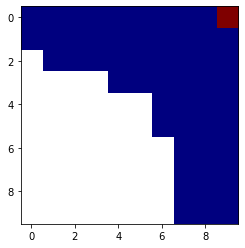

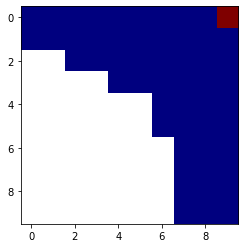

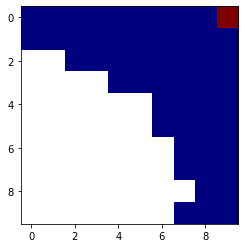

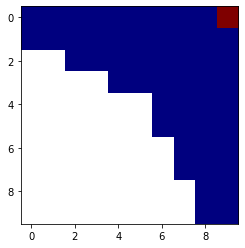

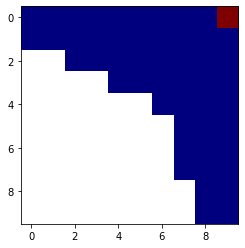

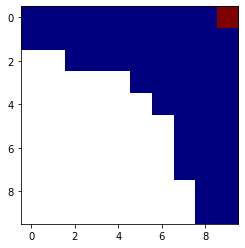

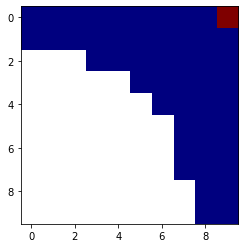

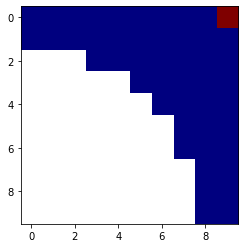

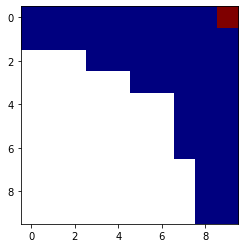

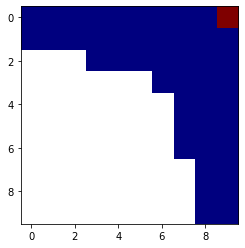

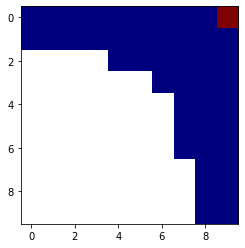

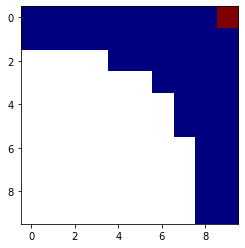

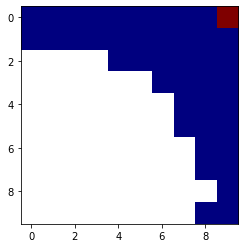

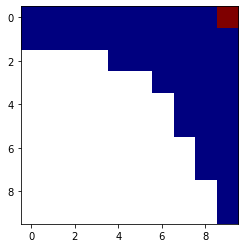

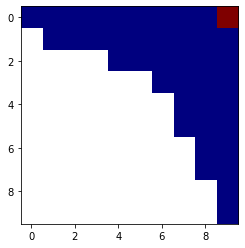

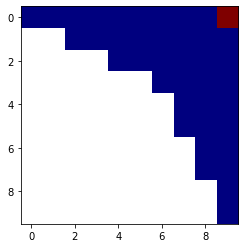

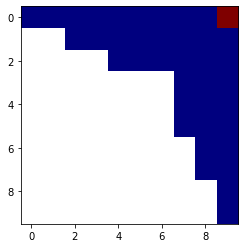

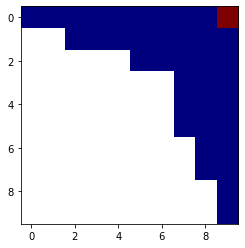

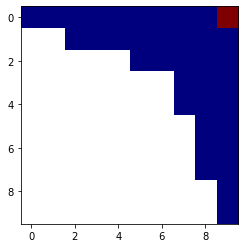

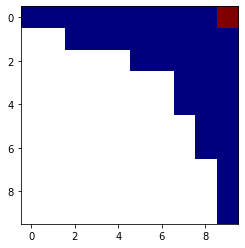

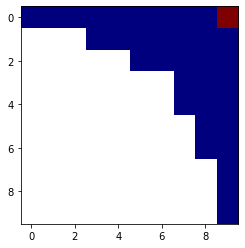

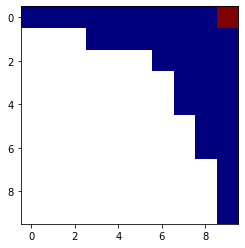

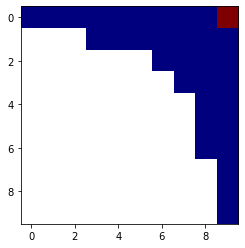

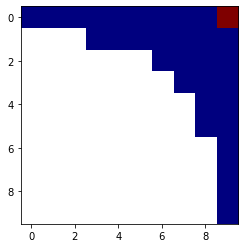

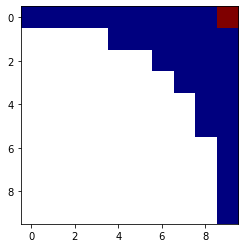

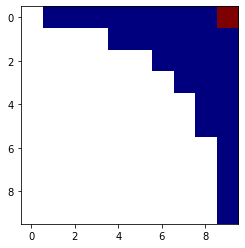

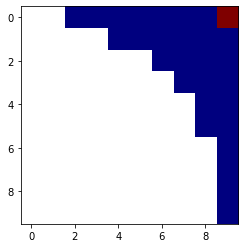

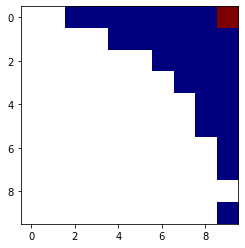

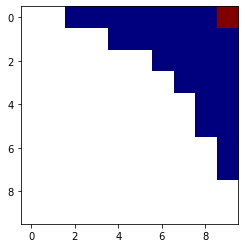

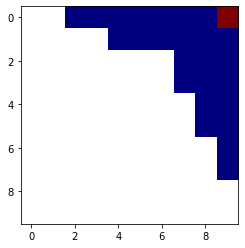

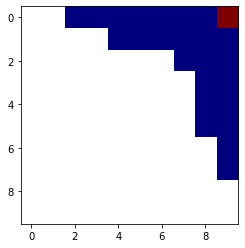

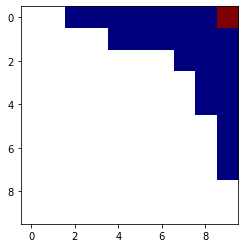

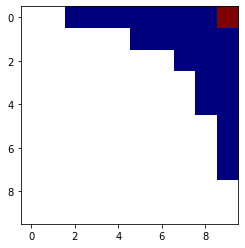

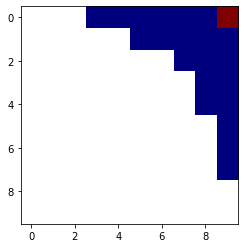

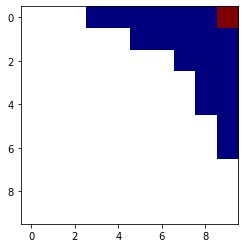

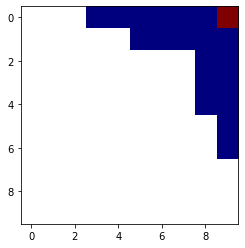

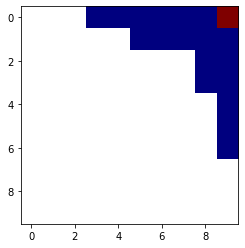

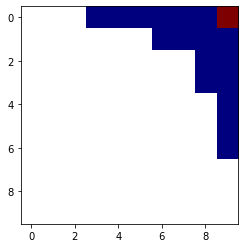

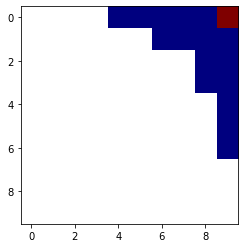

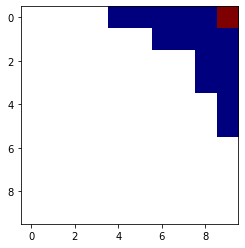

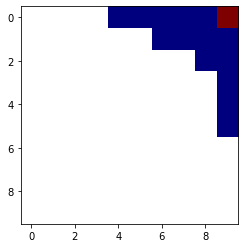

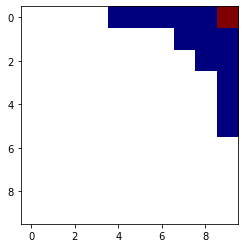

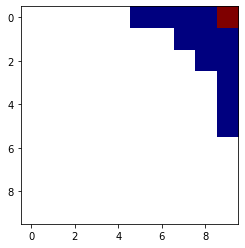

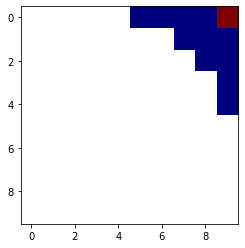

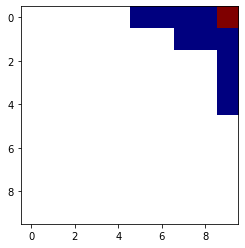

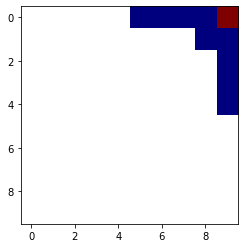

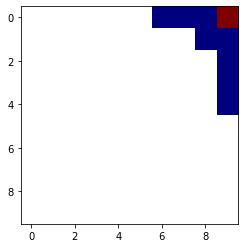

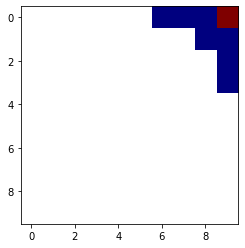

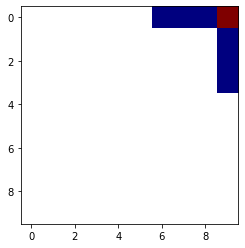

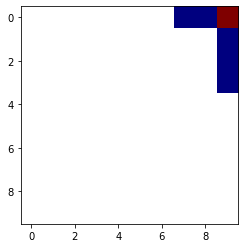

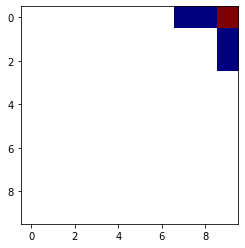

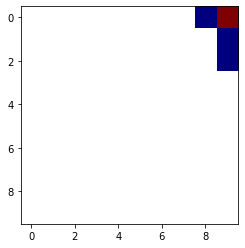

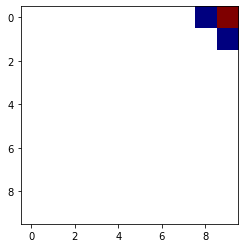

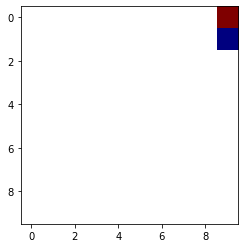

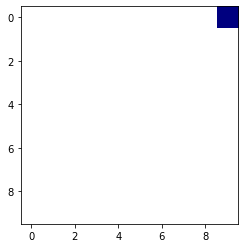

C:\Users\hybri\anaconda3\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\hybri\anaconda3\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\hybri\anaconda3\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


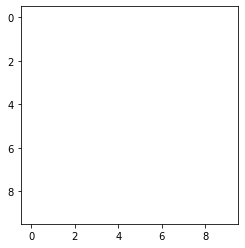

In [11]:
#Visualización del algoritmo de dijkstra
node_i = '9,0'
node_f = '0,9'
matrix = np.zeros([10,10])

obstacles = np.array(matrix, dtype=float)
p = np.zeros(shape=obstacles.shape)
i_fin = node_f.split(',')
f_n = np.zeros(shape=obstacles.shape)
f_n[int(i_fin[0]),int(i_fin[1])] = 5
path = dijkstra(node_i, node_f, matrix)[0]
for i in range(len(path)):
    x = path[i].split(',')
    p[int(x[0]),int(x[1])] = np.nan
    plt.imshow(f_n + p + obstacles, cmap='jet')
    plt.show()

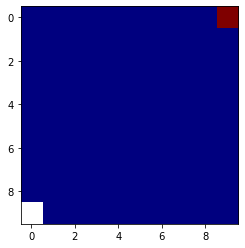

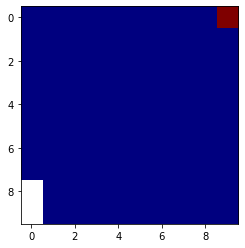

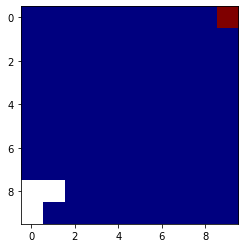

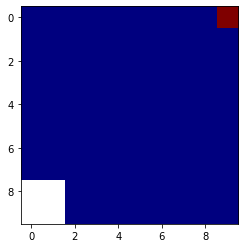

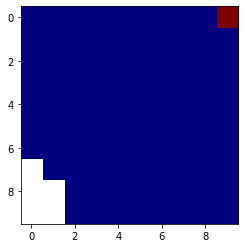

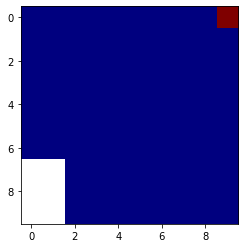

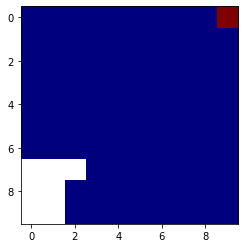

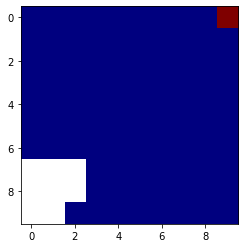

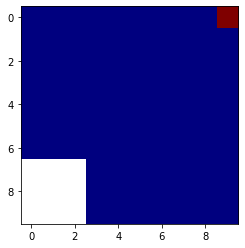

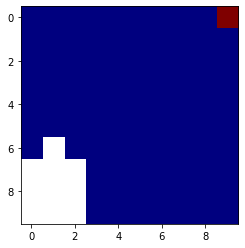

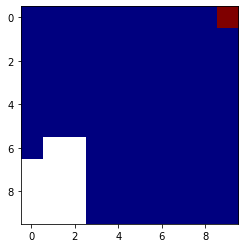

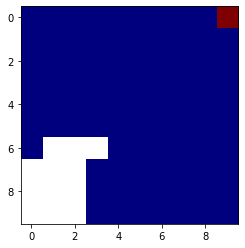

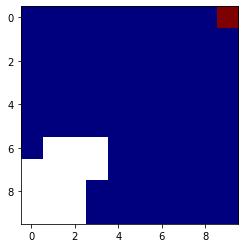

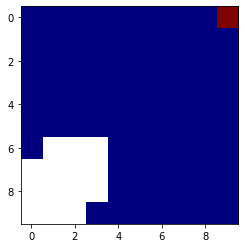

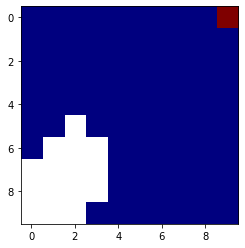

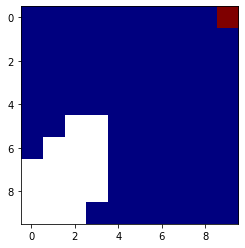

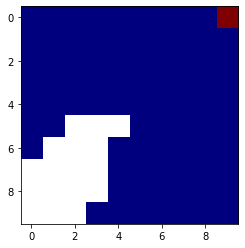

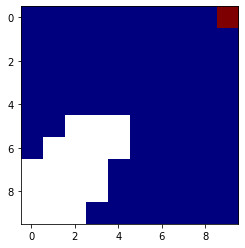

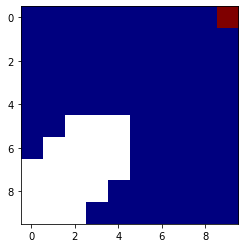

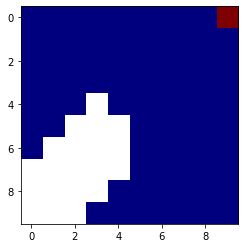

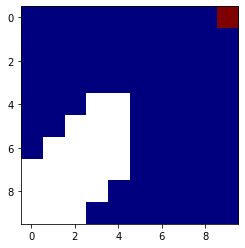

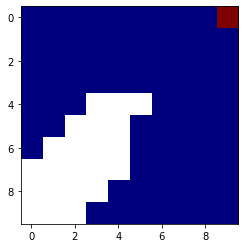

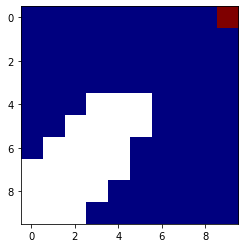

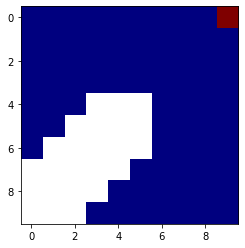

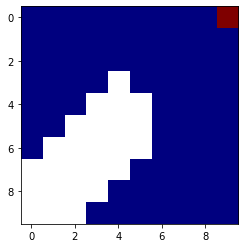

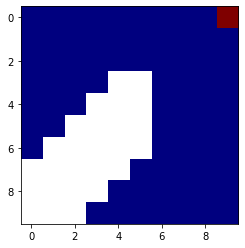

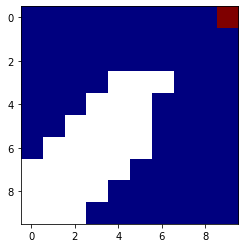

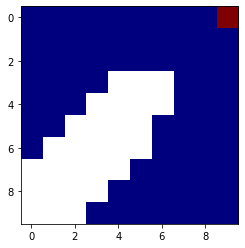

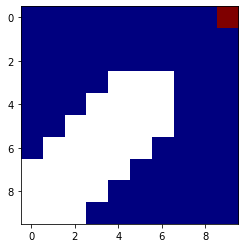

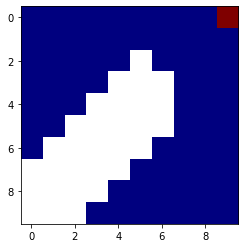

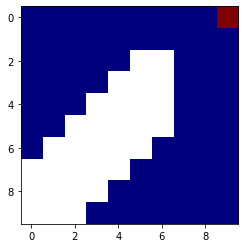

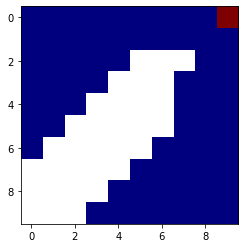

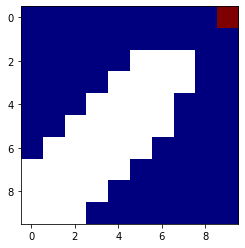

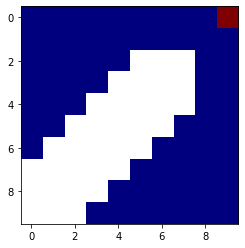

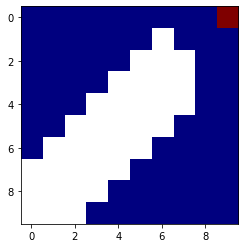

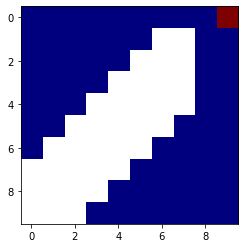

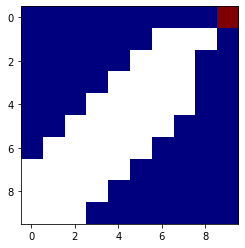

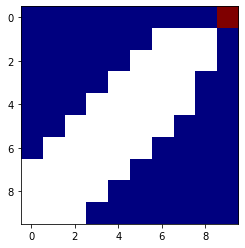

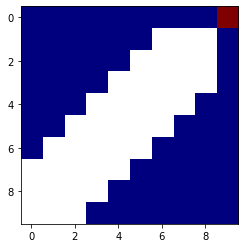

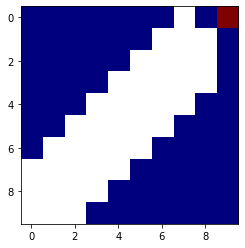

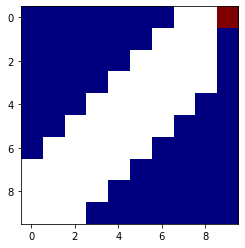

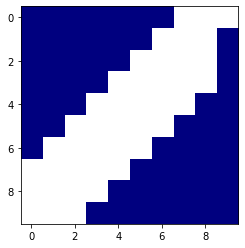

In [12]:
#Visualización del algoritmo de A*
node_i = '9,0'
node_f = '0,9'
matrix = np.zeros([10,10])

obstacles = np.array(matrix, dtype=float)
p = np.zeros(shape=obstacles.shape)
i_fin = node_f.split(',')
f_n = np.zeros(shape=obstacles.shape)
f_n[int(i_fin[0]),int(i_fin[1])] = 5
path = a_estrella(node_i, node_f, matrix)[0]
for i in range(len(path)):
    x = path[i].split(',')
    p[int(x[0]),int(x[1])] = np.nan
    plt.imshow(f_n + p + obstacles, cmap='jet')
    plt.show()

In [13]:
node_i = '5,0'
node_f = '0,5'
matrix = matrix_D

ejec_time = []
total_time = 0
n = 40000
m = 0
for l in range(n):
    if m == n//2:
        break
    i_time = time.time()
    dijkstra(node_i, node_f, matrix)[0]
    f_time = time.time()
    if f_time-i_time != 0:
        m += 1
        ejec_time.append(f_time-i_time)
        total_time += f_time-i_time
average_time_dijkstra_a = round((total_time / m) * 1000, 2)

In [14]:
node_i = '5,0'
node_f = '0,5'
matrix = matrix_D

ejec_time = []
total_time = 0
n = 40000
m = 0
for l in range(n):
    if m == n//2:
        break
    i_time = time.time()
    a_estrella(node_i, node_f, matrix)[0]
    f_time = time.time()
    if f_time-i_time != 0:
        m += 1
        ejec_time.append(f_time-i_time)
        total_time += f_time-i_time
average_time_A_star = round((total_time / m) * 1000, 2)

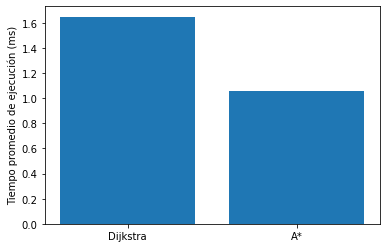

In [15]:
# Datos
x = ["Dijkstra", "A*"]
y = [average_time_dijkstra_a, average_time_A_star]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
plt.ylabel("Tiempo promedio de ejecución (ms)")
plt.show()

In [16]:
n = 20
nodes_number = []
nodes_dijkstra = []
nodes_a_estrella = []
for i in range(n):
    node_i = str(i) + ',0'
    node_f = '0,' + str(i)
    matrix = p = np.zeros([i+1,i+1])
    nodes_number.append((i+1)**2)
    nodes_dijkstra.append(len(dijkstra(node_i, node_f, matrix)[0]))
    nodes_a_estrella.append(len(a_estrella(node_i, node_f, matrix)[0]))

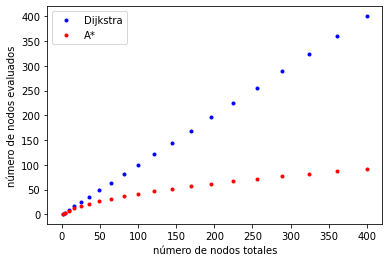

In [17]:
plt.plot(nodes_number, nodes_dijkstra, ".",color="b", label = 'Dijkstra')
plt.legend()
plt.plot(nodes_number, nodes_a_estrella , ".",color="r", label = 'A*')
plt.legend()
plt.xlabel('número de nodos totales')
plt.ylabel('número de nodos evaluados')
plt.show()